In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
dump_contents = os.listdir('../dump_01')
filename_split = dump_contents[0].split('_')
filename_split
dump_contents

['lattice_t_1.00_temp_60.00.bin',
 'lattice_t_10.00_temp_599.73.bin',
 'lattice_t_10.00_temp_599.81.bin',
 'lattice_t_10.00_temp_599.88.bin',
 'lattice_t_10.00_temp_599.96.bin',
 'lattice_t_2.00_temp_120.00.bin',
 'lattice_t_3.00_temp_180.00.bin',
 'lattice_t_4.00_temp_240.00.bin',
 'lattice_t_5.00_temp_300.00.bin',
 'lattice_t_6.00_temp_360.00.bin',
 'lattice_t_7.00_temp_420.00.bin',
 'lattice_t_7.85_temp_471.24.bin',
 'lattice_t_8.10_temp_486.10.bin',
 'lattice_t_8.18_temp_490.91.bin',
 'lattice_t_8.28_temp_497.04.bin',
 'lattice_t_8.33_temp_499.51.bin',
 'lattice_t_8.37_temp_502.00.bin',
 'lattice_t_8.40_temp_504.10.bin',
 'lattice_t_8.44_temp_506.17.bin',
 'lattice_t_8.46_temp_507.62.bin',
 'lattice_t_8.48_temp_508.50.bin',
 'lattice_t_8.51_temp_510.41.bin',
 'lattice_t_8.54_temp_512.69.bin',
 'lattice_t_8.57_temp_514.12.bin',
 'lattice_t_8.58_temp_514.91.bin',
 'lattice_t_8.59_temp_515.40.bin',
 'lattice_t_8.61_temp_516.35.bin',
 'lattice_t_8.63_temp_517.53.bin',
 'lattice_t_8.64_

In [3]:
cu_thickness = 100e-9  
distance = 2.54e-10
number_of_atoms_in_y = cu_thickness / distance 

# parameters
grid_dim_y = int(number_of_atoms_in_y)
grid_dim_x = grid_dim_y // 10

In [4]:
save_list = []
for i in [0,5,6,7,8,9,15, 20, 25, 50, 75, 100]:
    filename = dump_contents[i]
    filename_split = filename.split('_')
    time = filename_split[2]
    temperature = filename_split[-1][-4]
    lattice_raw = np.fromfile(f'../dump/{filename}')
    lattice = lattice_raw.reshape((grid_dim_y, grid_dim_x))
    data = [time, temperature, lattice]
    save_list.append(data)
    

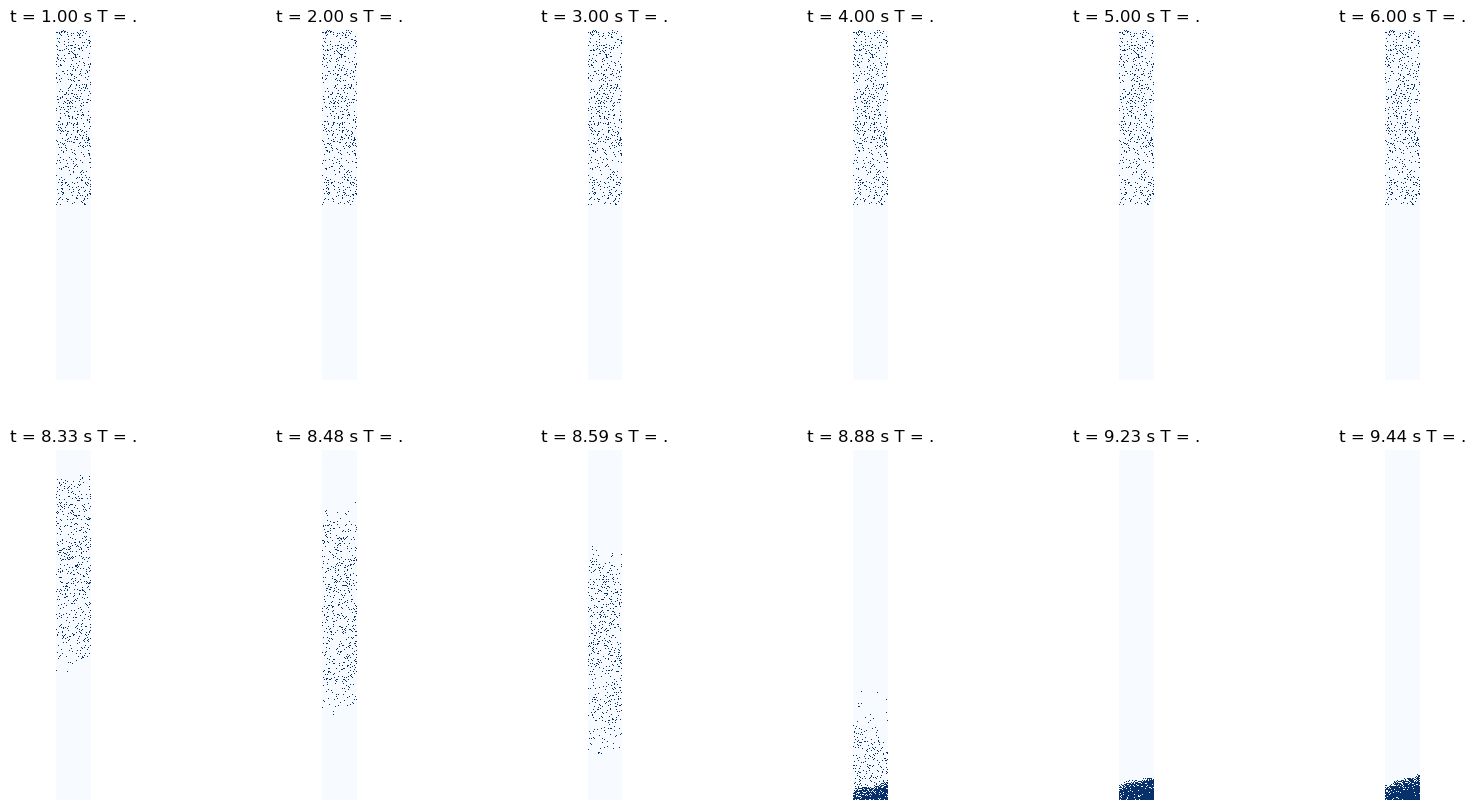

In [7]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
for k, (time, temperature, lattice) in enumerate(save_list):
    j = k % 6
    i = 0 if k < 6 else 1
    axs[(i,j)].axis('off')
    axs[(i,j)].set_title('t = {time} s T = {temperature}'.format(time=time, temperature=temperature))
    sns.heatmap(lattice, cmap='Blues' , cbar=False, square=True, ax=axs[(i,j)], yticklabels=True, xticklabels=True)

In [6]:
for k, _ in enumerate(save_list):
    j = k % 6
    i = 0 if k < 6 else 1
    print(i, j)
    

0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
